# Interview Analysis: Security Tool Evaluation Study

## Study Overview
- **Total Participants**: (loaded from Excel)
- **Framework**: Technology Acceptance Model (TAM)
- **Focus Areas**: Perceived Usefulness, Perceived Ease of Use, Trust & Reliability, Behavioral Intention

## Interview Questions

### Perceived Usefulness (PU)
1. In your experience, how useful was the tool in identifying security vulnerabilities in LLM-generated code?
2. How valuable did you find the vulnerability classification (e.g., CWE category) provided by the tool?
3. To what extent did the patch suggestions help you understand the detected vulnerabilities?
4. Do you think using this tool would reduce your overall time spent on security reviews?

### Perceived Ease of Use (PEOU)
5. Was it easy to understand the tool's outputs (warnings, explanations, patches)?
6. Did you encounter any difficulties in understanding why a vulnerability was flagged?
7. Was the overall workflow of the tool easy to understand?

### Trust, Reliability & Risk Perception
8. On a scale of 1 to 5, how much do you trust the results generated by the tool?
9. Have you encountered any unknown vulnerability scenario?

### Behavioral Intention to Use (BI)
10. On a scale of 1 to 5, how likely would you be to use the tool in your development environment?
11. At which stage would you prefer to use this tool?
    - a. During code generation
    - b. During code review
    - c. Before deployment
12. Would you recommend this tool to other developers?

## Data Source

This notebook reads the **final interview responses** from the Excel file `interview_response_filled.xlsx`.

**Expected columns**:
- `participant_id`
- `question_id`
- `category` (TAM construct)
- `scale_response` (only for Likert questions)
- `response_text`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import display
from collections import Counter, defaultdict
import textwrap

# Set style for thesis-ready plots
plt.style.use('seaborn-v0_8-paper')
sns.set_palette('colorblind')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['legend.fontsize'] = 10

print("✓ Libraries imported")

# Create output folder
Path('outputs').mkdir(exist_ok=True)


✓ Libraries imported


## 1. Load Interview Data

In [2]:
# Load interview responses from Excel file
from pathlib import Path
import pandas as pd

# Prefer local file (same folder as notebook). Fallback to /mnt/data for the provided environment.
data_path = Path('data/interview_response_filled.xlsx')
if not data_path.exists():
    data_path = Path('/mnt/data/interview_response_filled.xlsx')

print(f"Loading interview data from: {data_path}")
df = pd.read_excel(data_path)

# Ensure output directory exists
Path('outputs').mkdir(exist_ok=True)


# Basic sanity checks
required_cols = {'participant_id','question_id','category','scale_response','response_text'}
missing = required_cols - set(df.columns)
if missing:
    raise ValueError(f"Missing required columns in Excel: {sorted(missing)}")

print(f"Loaded {len(df)} interview responses")
print(f"Participants: {df['participant_id'].nunique()} | Questions: {df['question_id'].nunique()}")

# Keep things consistent
for col in ['participant_id','question_id','category']:
    df[col] = df[col].astype(str).str.strip()

# Normalize text
df['response_text'] = df['response_text'].fillna('').astype(str).str.strip()

Loading interview data from: data\interview_response_filled.xlsx
Loaded 120 interview responses
Participants: 10 | Questions: 12


## 2. Thematic Coding (TAM-Based)

The interview sheet already provides a **TAM construct** for each response in the `category` column. 

In [3]:

# Theme label derived from question_id (e.g., 'Q1_PU_Vulnerability_Detection' -> 'PU_Vulnerability_Detection')
df['theme_label'] = df['question_id'].str.replace(r'^Q\d+_', '', regex=True)

# Store as list to keep compatibility with downstream cells that expect a list of themes
df['themes'] = df['theme_label'].apply(lambda x: [x])
df['theme_count'] = 1

print("Themes generated from question_id. Example labels:")
print(sorted(df['theme_label'].unique())[:6])
print(f"Theme rows with labels: {df['theme_label'].nunique()} unique theme labels")

Themes generated from question_id. Example labels:
['BI_Likelihood_Scale', 'BI_Recommendation', 'BI_Usage_Stage', 'PEOU_Flagging_Clarity', 'PEOU_Output_Understanding', 'PEOU_Workflow']
Theme rows with labels: 12 unique theme labels


## 3. Quantitative Analysis: Scale Responses

SCALE RESPONSE ANALYSIS (1–5 Likert Scale)

Q8: Trust in Tool Results (1=Low, 5=High)
  Mean: 4.00
  Median: 4.0
  Std Dev: 0.00
  Distribution: {4.0: 10}


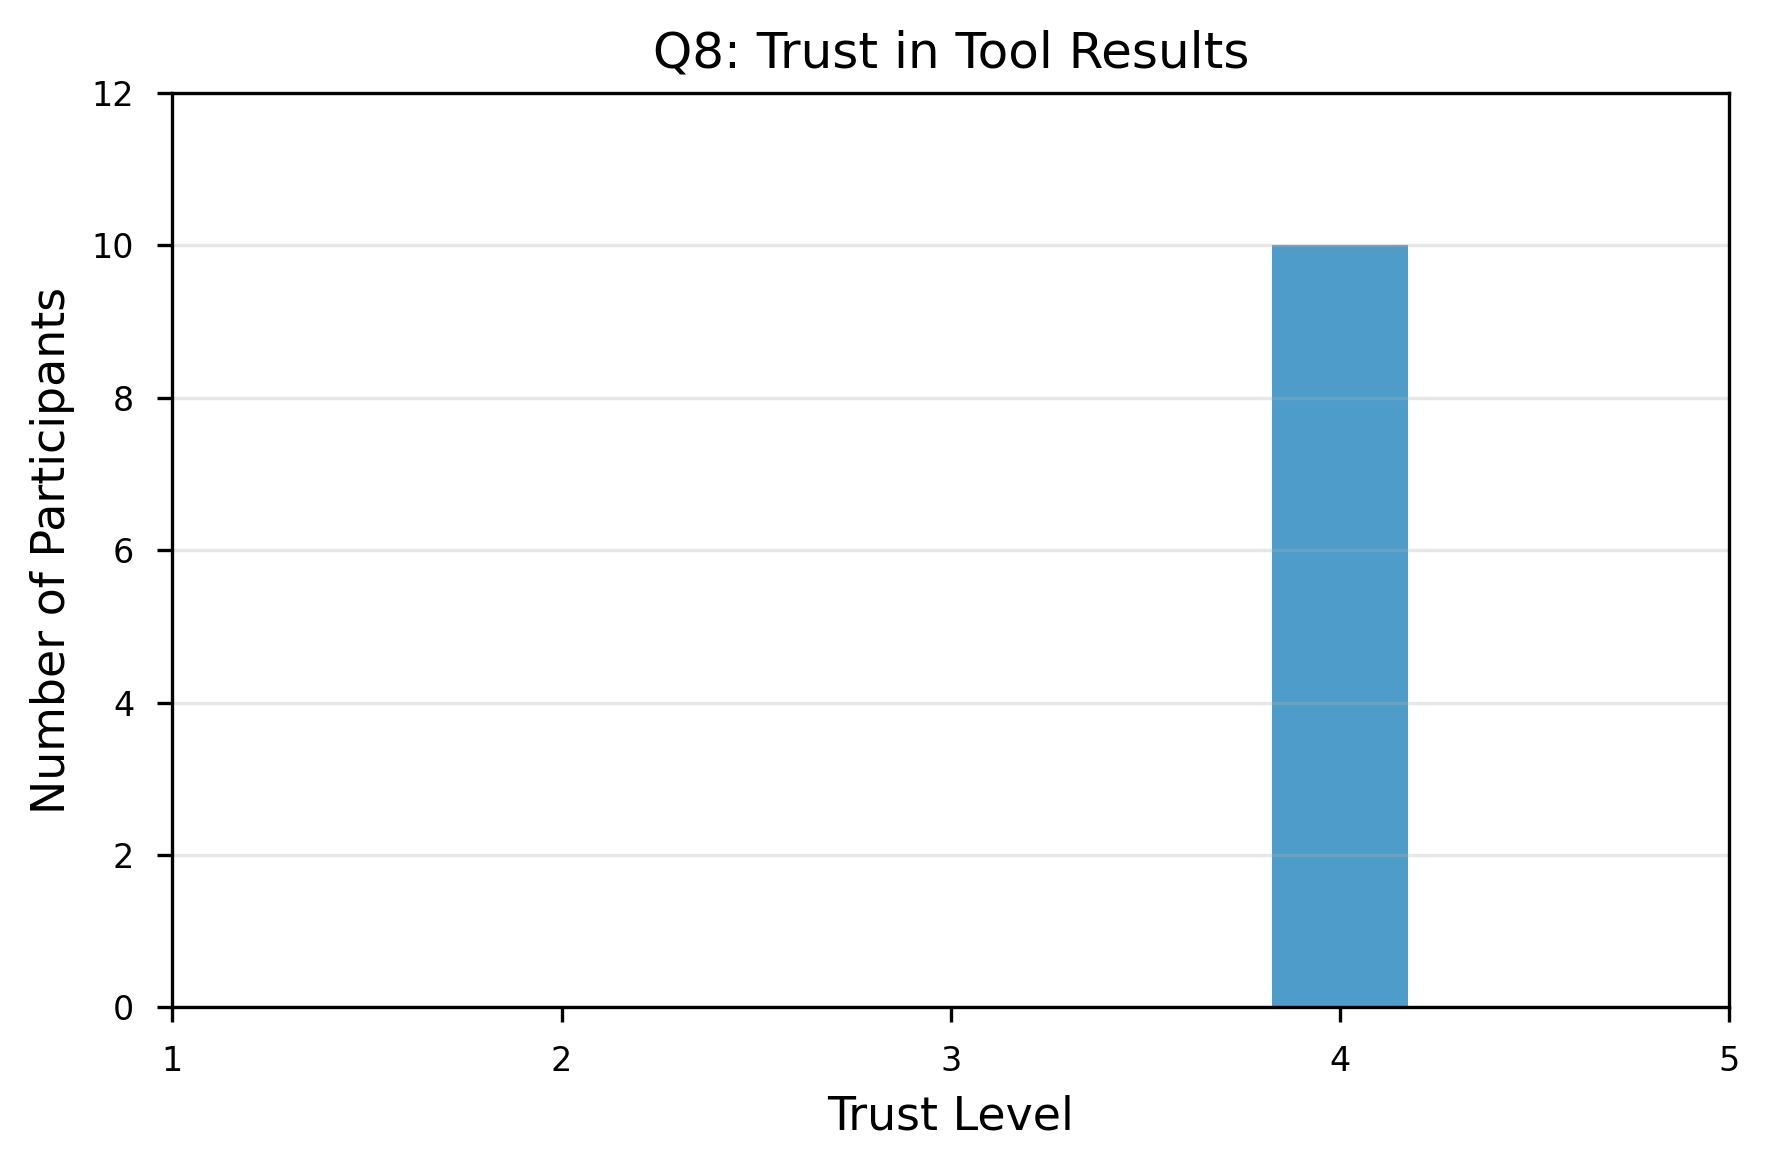

✓ Q8 trust distribution plot saved to: outputs/Q8_trust_distribution.png

Q10: Likelihood to Use Tool (1=Unlikely, 5=Very Likely)
  Mean: 4.35
  Median: 4.0
  Std Dev: 0.47
  Distribution: {4.0: 6, 4.5: 1, 5.0: 3}


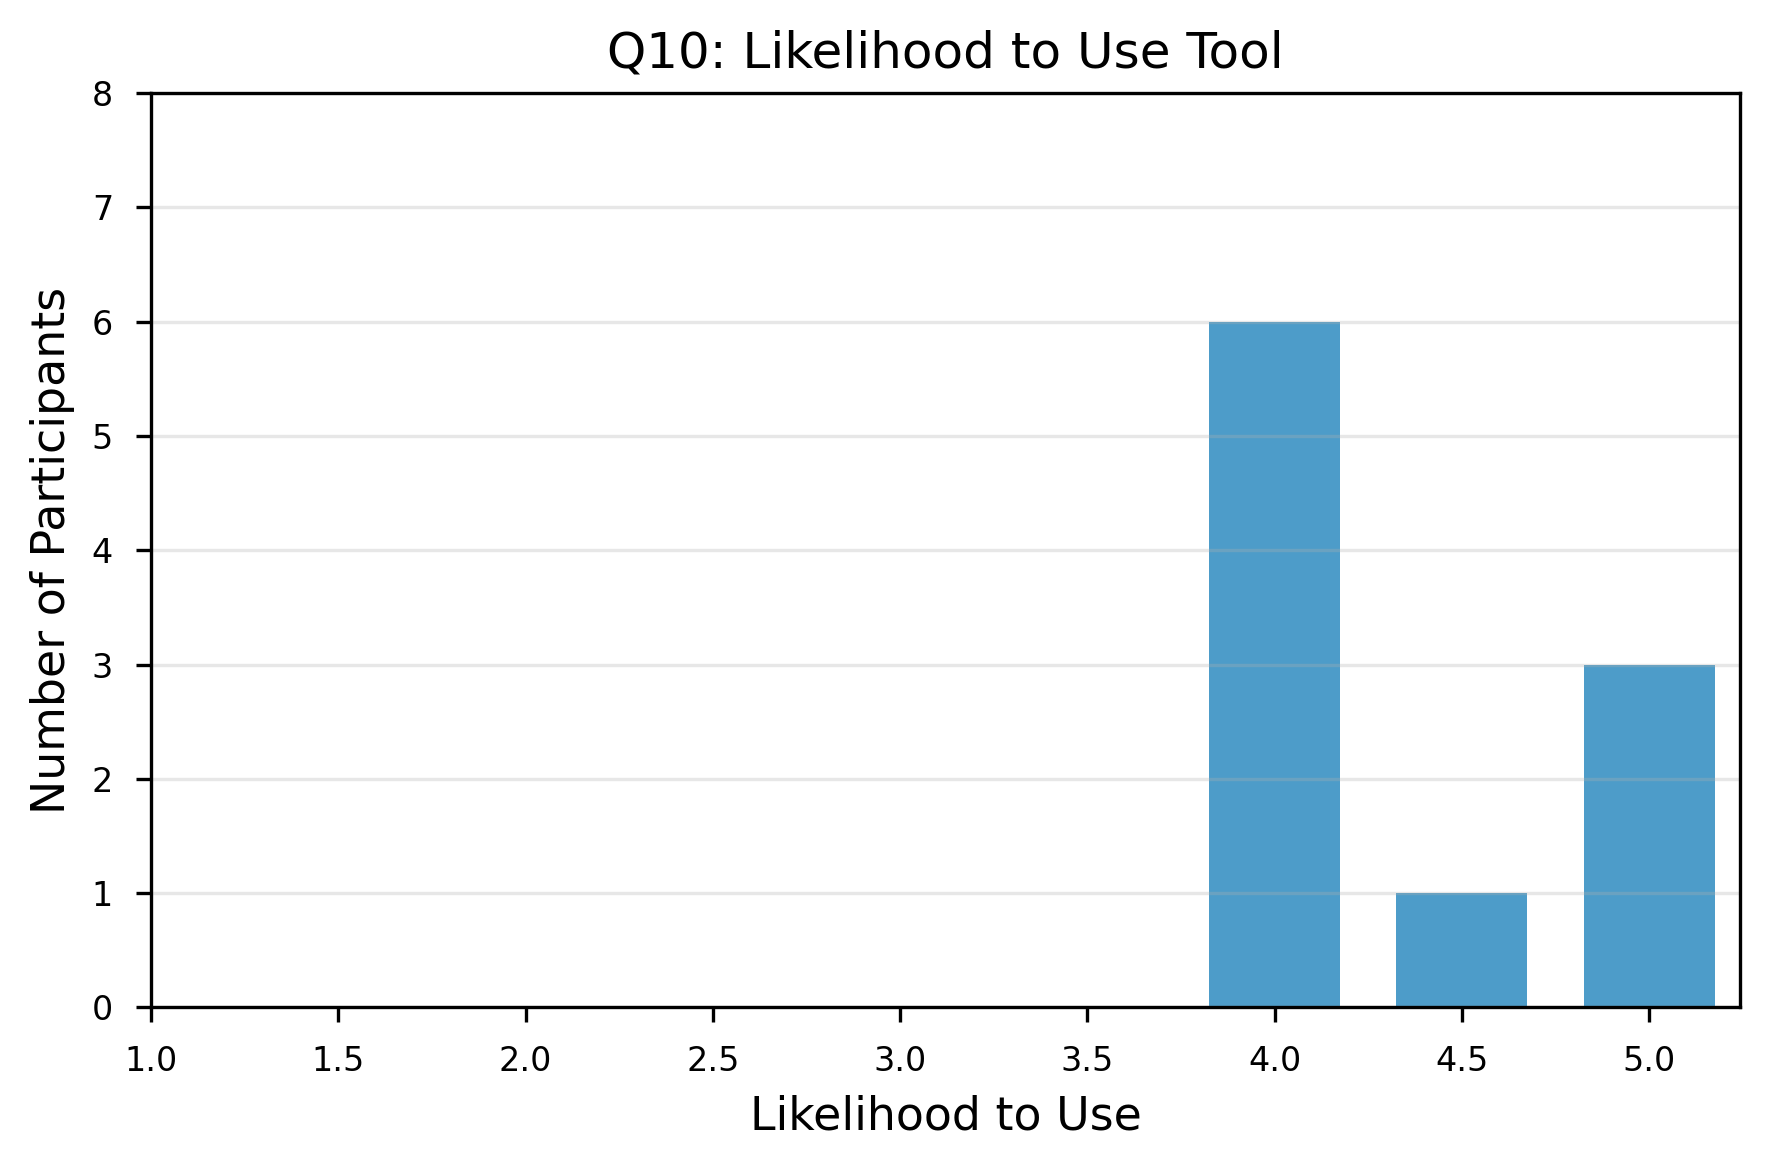

✓ Q10 likelihood distribution plot saved to: outputs/Q10_likelihood_distribution.png



In [4]:
import matplotlib.pyplot as plt
from pathlib import Path

# Ensure output directory exists
Path("outputs").mkdir(exist_ok=True)

# Analyze Likert scale responses
scale_questions = df[df['scale_response'].notna()].copy()

if len(scale_questions) > 0:
    print("=" * 60)
    print("SCALE RESPONSE ANALYSIS (1–5 Likert Scale)")
    print("=" * 60)

    # -------------------------
    # Q8: Trust Scale Analysis
    # -------------------------
    q8_responses = df[df['question_id'] == 'Q8_Trust_Scale']['scale_response']

    if len(q8_responses) > 0:
        print("\nQ8: Trust in Tool Results (1=Low, 5=High)")
        print(f"  Mean: {q8_responses.mean():.2f}")
        print(f"  Median: {q8_responses.median():.1f}")
        print(f"  Std Dev: {q8_responses.std():.2f}")
        print(f"  Distribution: {dict(q8_responses.value_counts().sort_index())}")

        q8_counts = q8_responses.value_counts().sort_index()

        plt.figure(figsize=(6, 4))
        plt.bar(q8_counts.index, q8_counts.values, alpha=0.7,width=0.35)
        plt.xlabel("Trust Level")
        plt.ylabel("Number of Participants")
        plt.title("Q8: Trust in Tool Results")
        plt.xticks([1, 2, 3, 4, 5])
        plt.ylim(0, max(q8_counts.values) + 2)
        plt.grid(axis="y", alpha=0.3)

        plt.tight_layout()
        plt.savefig("outputs/Q8_trust_distribution.png", dpi=300, bbox_inches="tight")
        plt.show()

        print("✓ Q8 trust distribution plot saved to: outputs/Q8_trust_distribution.png")

    # ---------------------------------
    # Q10: Likelihood to Use Analysis
    # ---------------------------------
    q10_responses = df[df['question_id'] == 'Q10_BI_Likelihood_Scale']['scale_response']

    if len(q10_responses) > 0:
        print("\nQ10: Likelihood to Use Tool (1=Unlikely, 5=Very Likely)")
        print(f"  Mean: {q10_responses.mean():.2f}")
        print(f"  Median: {q10_responses.median():.1f}")
        print(f"  Std Dev: {q10_responses.std():.2f}")
        print(f"  Distribution: {dict(q10_responses.value_counts().sort_index())}")

        q10_counts = q10_responses.value_counts().sort_index()

        plt.figure(figsize=(6, 4))
        plt.bar(q10_counts.index, q10_counts.values, alpha=0.7, width=0.35)
        plt.xlabel("Likelihood to Use")
        plt.ylabel("Number of Participants")
        plt.title("Q10: Likelihood to Use Tool")
        plt.xticks([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
        plt.ylim(0, max(q10_counts.values) + 2)
        plt.grid(axis="y", alpha=0.3)

        plt.tight_layout()
        plt.savefig("outputs/Q10_likelihood_distribution.png", dpi=300, bbox_inches="tight")
        plt.show()

        print("✓ Q10 likelihood distribution plot saved to: outputs/Q10_likelihood_distribution.png")

    print("\n" + "=" * 60)

else:
    print("⚠ No scale responses found in the dataset")


Q11: PREFERRED USAGE STAGE ANALYSIS
  During code generation + During code review: 2 (20.0%)
  Before deployment: 1 (10.0%)
  During code generation: 2 (20.0%)
  During code generation + During code review + Before deployment: 1 (10.0%)
  During code review: 2 (20.0%)
  During code generation + Before deployment: 1 (10.0%)
  During code review + Before deployment: 1 (10.0%)

✓ Stage preference plot saved to: data/usage_stage_preference.png


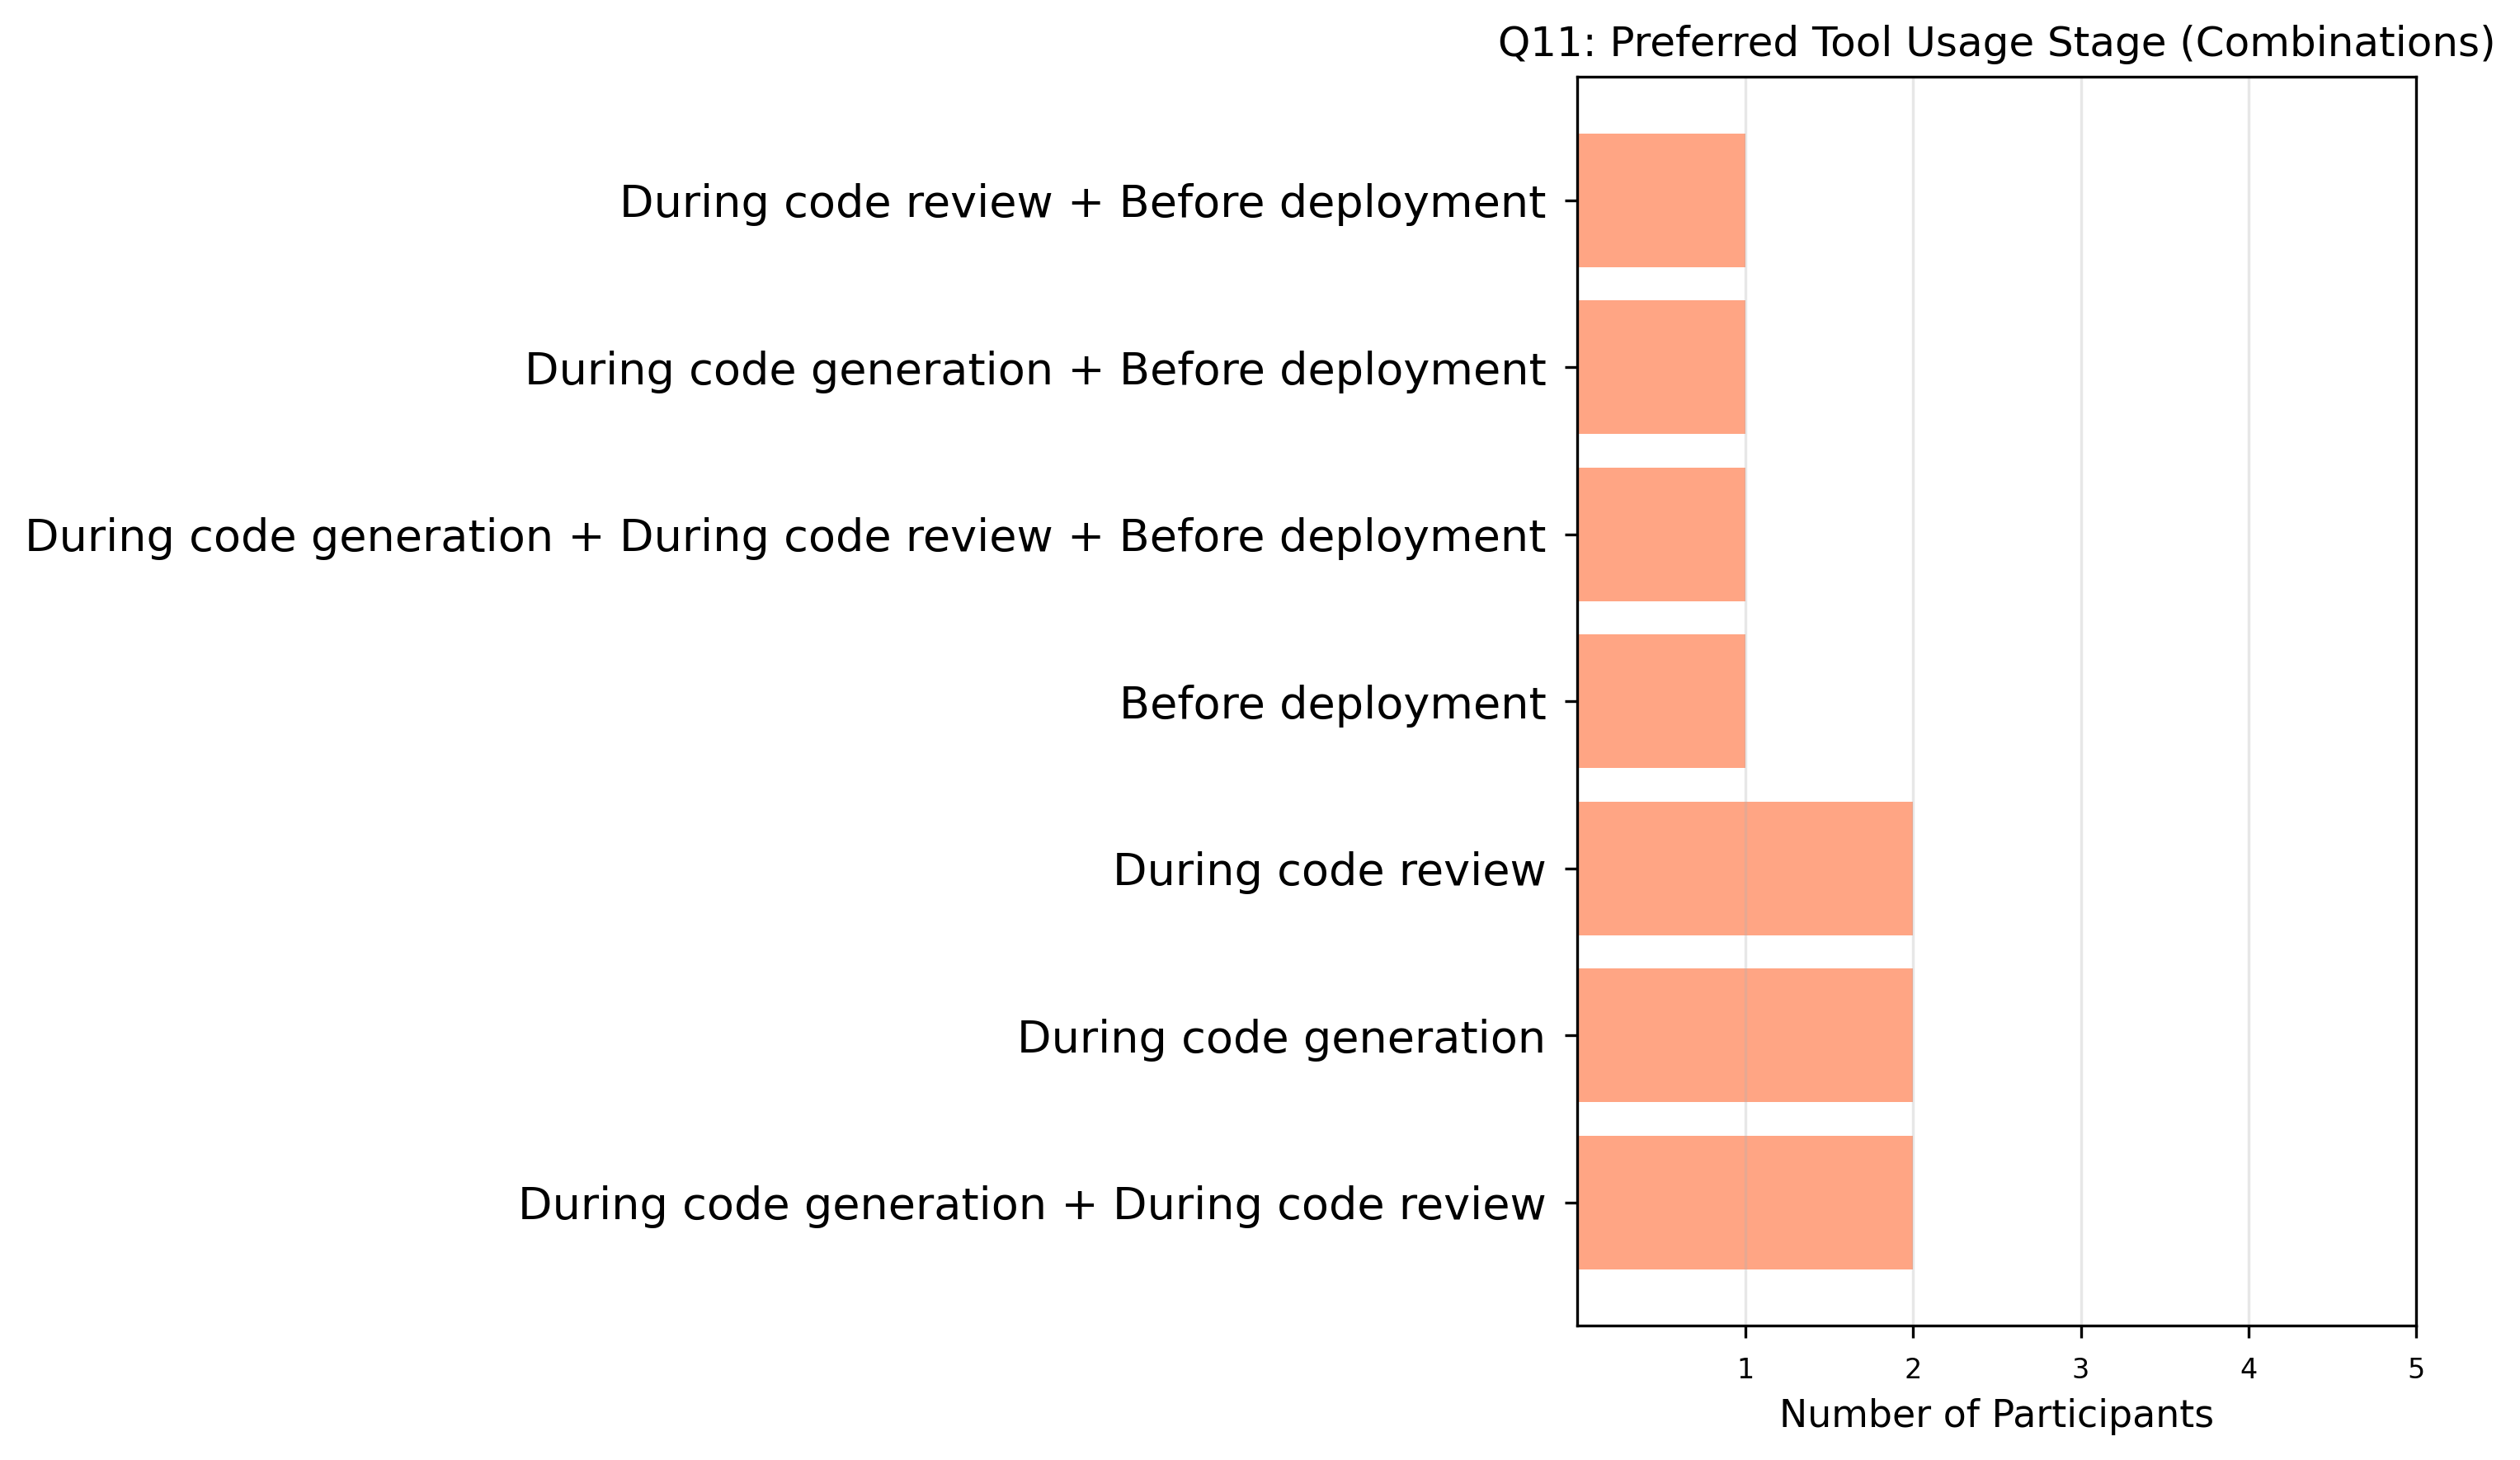

In [5]:
# Q11: Usage Stage Preference Analysis

q11_responses = df[df['question_id'] == 'Q11_BI_Usage_Stage']['response_text']

if len(q11_responses) > 0:
    print("="*60)
    print("Q11: PREFERRED USAGE STAGE ANALYSIS")
    print("="*60)
    
    # Extract stage preference combinations from responses (strict phrases only)
    stage_patterns = {
        'During code generation': ['code generation', 'codegen', 'development phase', 'during development'],
        'During code review': ['code review', 'review phase', 'during review'],
        'Before deployment': ['before deployment', 'pre-deployment', 'prior to deployment', 'deployment phase']
    }
    stage_order = list(stage_patterns.keys())
    combo_counts = {}

    for response in q11_responses:
        response_lower = str(response).lower()
        selected = []
        for stage in stage_order:
            if any(phrase in response_lower for phrase in stage_patterns[stage]):
                selected.append(stage)
        if not selected:
            continue
        label = " + ".join(selected)
        combo_counts[label] = combo_counts.get(label, 0) + 1
    
    if len(combo_counts) > 0:
        for stage_combo, count in combo_counts.items():
            percentage = (count / len(q11_responses)) * 100
            print(f"  {stage_combo}: {count} ({percentage:.1f}%)")
        
        # Visualization
        plt.figure(figsize=(10, 6))
        stages = [k for k, _ in sorted(combo_counts.items(), key=lambda kv: kv[1], reverse=True)]
        counts = [combo_counts[k] for k in stages]

        plt.barh(stages, counts, color='coral', alpha=0.7)
        plt.yticks(fontsize=13)
        plt.xlabel('Number of Participants')
        plt.title('Q11: Preferred Tool Usage Stage (Combinations)')
        plt.grid(axis='x', alpha=0.3)
        plt.xticks([1, 2, 3, 4,5])
        plt.tight_layout()
        plt.savefig('outputs/usage_stage_preference.png', dpi=300, bbox_inches='tight')
        print("\n✓ Stage preference plot saved to: data/usage_stage_preference.png")
        plt.show()
        print("="*60)
    else:
        print("⚠ No usable Q11 responses found")
else:
    print("⚠ No Q11 responses found")
